In [1]:
try:
    import google.colab
    import requests
    url = 'https://raw.githubusercontent.com/manojmanivannan/machine-learning-with-PyTorch/master/config.py'
    r = requests.get(url, allow_redirects=True)
    open('config.py', 'wb').write(r.content)    
except ModuleNotFoundError:
    pass

from config import *
config_chapter0()

In [2]:
from prediction_models.genericRegressionClassification import *
from plots.stage1 import *
import pandas as pd
from explore.analytics import correlation_matrix, get_principle_component
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA

# read the dataset using pandas
columns = ['freq','aoa','chord_len','velocity','thickness','sound_level']
dataset_path = '../dataset/uci/airfoil_noise/airfoil_self_noise.dat' if not IS_COLAB else 'dataset/uci/airfoil_noise/airfoil_self_noise.dat'
df = pd.read_csv('../dataset/uci/airfoil_noise/airfoil_self_noise.dat', sep='\t', names = columns, header=None)

In [4]:
df.describe()

,freq,aoa,chord_len,velocity,thickness,sound_level
count,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000
mean,2886.380572,6.782302,0.136548,50.860745,0.011140,124.835943
std,3152.573137,5.918128,0.093541,15.572784,0.013150,6.898657
min,200.000000,0.000000,0.025400,31.700000,0.000401,103.380000
25%,800.000000,2.000000,0.050800,39.600000,0.002535,120.191000
50%,1600.000000,5.400000,0.101600,39.600000,0.004957,125.721000
75%,4000.000000,9.900000,0.228600,71.300000,0.015576,129.995500
max,20000.000000,22.200000,0.304800,71.300000,0.058411,140.987000


array([[<AxesSubplot:title={'center':'freq'}>,
        <AxesSubplot:title={'center':'aoa'}>],
       [<AxesSubplot:title={'center':'chord_len'}>,
        <AxesSubplot:title={'center':'velocity'}>],
       [<AxesSubplot:title={'center':'thickness'}>,
        <AxesSubplot:title={'center':'sound_level'}>]], dtype=object)

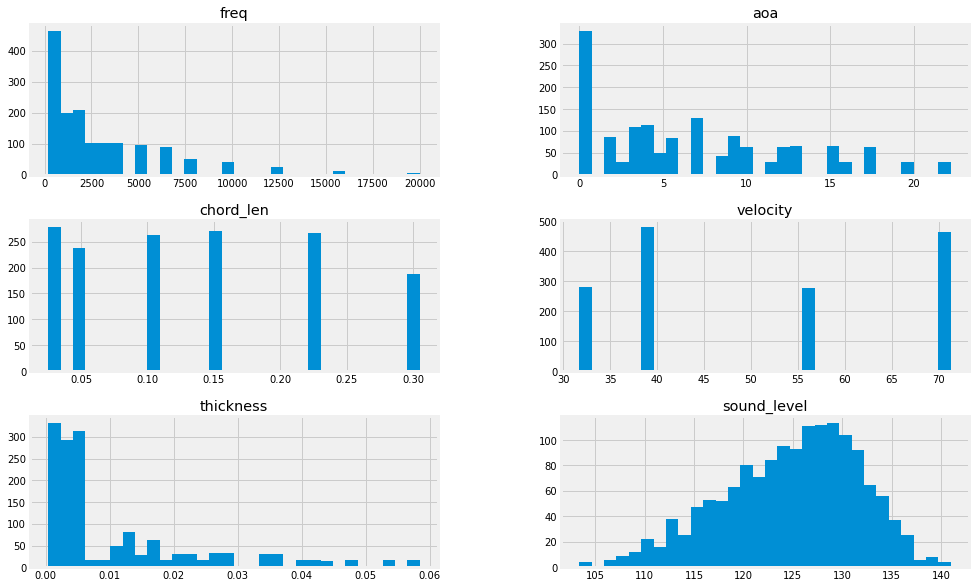

In [5]:
df.hist(bins=30,figsize=(15, 10))

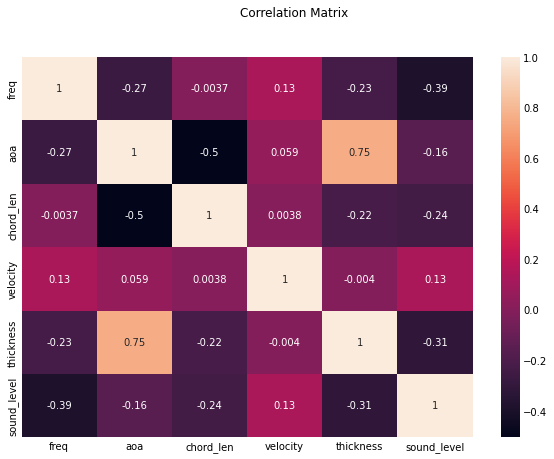

,freq,aoa,chord_len,velocity,thickness,sound_level
freq,1.000000,-0.272765,-0.003661,0.133664,-0.230107,-0.390711
aoa,-0.272765,1.000000,-0.504868,0.058760,0.753394,-0.156108
chord_len,-0.003661,-0.504868,1.000000,0.003787,-0.220842,-0.236162
velocity,0.133664,0.058760,0.003787,1.000000,-0.003974,0.125103
thickness,-0.230107,0.753394,-0.220842,-0.003974,1.000000,-0.312670
sound_level,-0.390711,-0.156108,-0.236162,0.125103,-0.312670,1.000000


In [6]:
correlation_matrix(df,plot=True)

It appears that aoa ( angle of attach) and the thickness (Suction side displacement thickness) have a strong correlation. so we have combine them both into a single feature

In [7]:
pca = PCA(n_components=1)
pca.fit(np.array(df[["aoa","thickness"]]))
print("variance explained : ",pca.explained_variance_ratio_)

y = pca.transform(np.array(df[["aoa","thickness"]]))
new_component = pd.DataFrame(y)
new_component = new_component.rename(columns={0: 'new_component'})
df["new_component"] = new_component
df.drop(['aoa','thickness'], axis=1, inplace=True)

variance explained :  [0.99999787]


In [8]:
df

,freq,chord_len,velocity,sound_level,new_component
0,800,0.3048,71.3,126.201,-6.782307
1,1000,0.3048,71.3,125.201,-6.782307
2,1250,0.3048,71.3,125.951,-6.782307
3,1600,0.3048,71.3,127.591,-6.782307
4,2000,0.3048,71.3,127.461,-6.782307
...,...,...,...,...,...
1498,2500,0.1016,39.6,110.264,8.817755
1499,3150,0.1016,39.6,109.254,8.817755
1500,4000,0.1016,39.6,106.604,8.817755
1501,5000,0.1016,39.6,106.224,8.817755


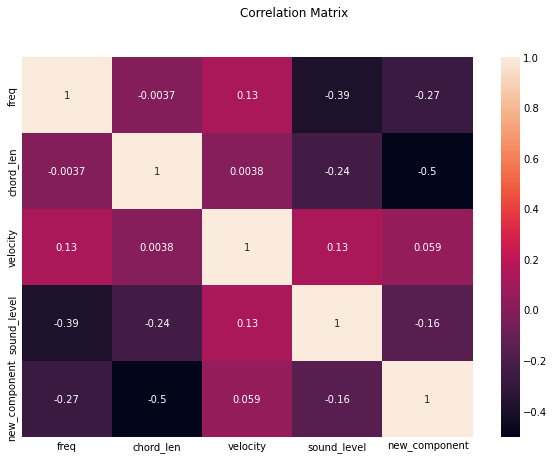

,freq,chord_len,velocity,sound_level,new_component
freq,1.000000,-0.003661,0.133664,-0.390711,-0.272765
chord_len,-0.003661,1.000000,0.003787,-0.236162,-0.504868
velocity,0.133664,0.003787,1.000000,0.125103,0.058759
sound_level,-0.390711,-0.236162,0.125103,1.000000,-0.156108
new_component,-0.272765,-0.504868,0.058759,-0.156108,1.000000


In [9]:
correlation_matrix(df,plot=True)

In [10]:
df_feature = df.drop(['sound_level'],axis=1)
df_target = df['sound_level']

Using 4 components, we can explain 100.0% of the variability in the original data.


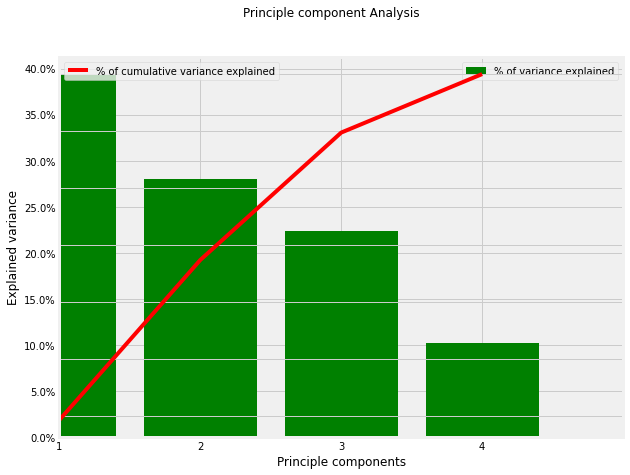

In [11]:
pca,n_components = get_principle_component(df_feature,least_components=1,least_explained_variance=0.90,plot=True)
pca_df = pd.DataFrame(pca.fit_transform(df_feature),columns=[f'PC-{i}' for i in range(1,n_components+1)])
choosen_columns = pca_df.columns


In [12]:
pca_df

,PC-1,PC-2,PC-3,PC-4
0,-2086.362876,-21.463173,-8.772604,0.091861
1,-1886.362945,-21.335593,-8.664675,0.092823
2,-1636.363033,-21.176118,-8.529764,0.094026
3,-1286.363155,-20.952854,-8.340888,0.095710
4,-886.363294,-20.697695,-8.125030,0.097634
...,...,...,...,...
1498,-386.392388,10.629029,9.080176,0.044126
1499,263.607386,11.043663,9.430945,0.047252
1500,1113.607089,11.585877,9.889643,0.051341
1501,2113.606740,12.223775,10.429287,0.056152


At this point, the pca_df, which is a principle components data, can be used as the feature. but for now, I will go with the original features + the new_component

In [13]:
X_train,X_val,y_train,y_val = train_test_split(df_feature,df_target,test_size=0.2, random_state=13)
# X_train,X_val,y_train,y_val = train_test_split(pca_df,df_target,test_size=0.2, random_state=13)

sc_feature = StandardScaler()
sc_feature.fit(X_train)
X_train = sc_feature.transform(X_train)
X_val = sc_feature.transform(X_val)

# sc_target = StandardScaler()
# sc_target.fit(y_train.values.reshape(-1,1))
# y_train = sc_target.transform(y_train.values.reshape(-1,1))
# y_val = sc_target.transform(y_val.values.reshape(-1,1))

y_train = y_train.values.reshape(-1,1)
y_val = y_val.values.reshape(-1,1)


In [14]:
# fig = figure1(X_train, y_train, X_val, y_val); plt.show() # works only for if there is one feature

In [15]:
torch.manual_seed(13)

# Builds tensors from numpy arrays
x_train_tensor = torch.as_tensor(X_train).float()
y_train_tensor = torch.as_tensor(y_train.reshape(-1, 1)).float()

x_val_tensor = torch.as_tensor(X_val).float()
y_val_tensor = torch.as_tensor(y_val.reshape(-1, 1)).float()

# Builds dataset containing ALL data points
train_dataset = TensorDataset(x_train_tensor, y_train_tensor)
val_dataset = TensorDataset(x_val_tensor, y_val_tensor)

# Builds a loader of each set
train_loader = DataLoader(dataset=train_dataset, batch_size=100, shuffle=True)
val_loader = DataLoader(dataset=val_dataset, batch_size=100)

In [16]:
# Sets learning rate - this is "eta" ~ the "n" like Greek letter
lr = 0.02

torch.manual_seed(42)
# Now we can create a model and send it at once to the device
model = nn.Sequential(nn.Linear(len(choosen_columns), 1))
# model.add_module('linear1', nn.Linear(3, 1))


# Defines a SGD optimizer to update the parameters
# (now retrieved directly from the model)
optimizer = optim.SGD(model.parameters(), lr=lr)

# Defines a MSE loss function
loss_fn = nn.MSELoss(reduction='mean')
print(model.state_dict())

OrderedDict([('0.weight', tensor([[ 0.3823,  0.4150, -0.1171,  0.4593]])), ('0.bias', tensor([-0.1096]))])


In [17]:
# Clear the tensorboard logs directory
import shutil
try:
    shutil.rmtree('runs')
except FileNotFoundError:
    pass

In [18]:
sbs = StepByStep(model, loss_fn, optimizer)
sbs.set_loaders(train_loader,val_loader)
sbs.set_tensorboard('classy')
sbs.train(n_epochs=200)

print(model.state_dict())

OrderedDict([('0.weight', tensor([[-4.4165, -3.7594,  1.7595, -4.0137]], device='cuda:0')), ('0.bias', tensor([125.0694], device='cuda:0'))])


In [19]:
%load_ext tensorboard
%tensorboard --port 7000 --logdir runs

Reusing TensorBoard on port 7000 (pid 21188), started 1:47:35 ago. (Use '!kill 21188' to kill it.)

In [20]:
# Evalute the model on the training set
y_train_predictions = sbs.predict(x_train_tensor)
y_train_actual = y_train_tensor.detach().cpu().numpy()
train_mse = mean_squared_error(y_train_predictions,y_train_actual)

y_val_predictions = sbs.predict(x_val_tensor)
y_val_actual = y_val_tensor.detach().cpu().numpy()
val_mse = mean_squared_error(y_val_predictions,y_val_actual)

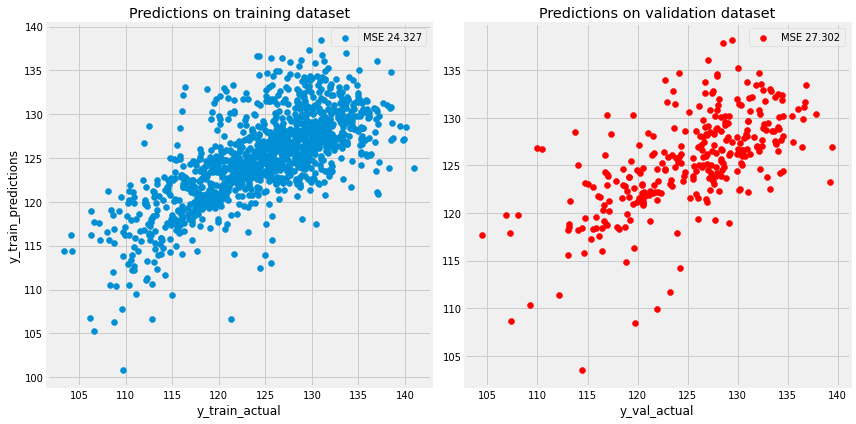

In [21]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].scatter(y_train_actual,y_train_predictions)
ax[0].set_xlabel('y_train_actual')
ax[0].set_ylabel('y_train_predictions')

ax[0].set_title('Predictions on training dataset')
ax[0].legend([f'MSE {mean_squared_error(y_train_predictions,y_train_actual):.3f}'])

ax[1].scatter(y_val_actual,y_val_predictions, c='r')
ax[1].set_xlabel('y_val_actual')
# ax[1].set_ylabel('y_val_predictions')

ax[1].set_title('Predictions on validation dataset')
ax[1].legend([f'MSE {mean_squared_error(y_val_predictions,y_val_actual):.3f}'])
fig.tight_layout()